In [1]:
import numpy as np
import matplotlib.pyplot as plt

Question 6 : On essaie avec un simple algo de descente avec un pas constant pour voir ce que ça donne...

In [2]:
t0=6
tf=19
dt=0.25
N=int((tf-t0)/dt)
alpha=100
k=0.2
Tsat=70
Tin=50
C=100
Pm=3000
PN=0
E=[2*np.exp(-((t0+dt*i)**2)/9) for i in range(N)]
Q=np.zeros(N)
Q[int((12-6)/dt)]=3

print(E,"\n",Q)

[0.03663127777746836, 0.026065814897018716, 0.01829189407685574, 0.012659430854971494, 0.008640478948188132, 0.005816069452371114, 0.0038609082724554186, 0.0025276533645532304, 0.0016319756701442965, 0.0010391493643096769, 0.0006525449076063968, 0.0004041205781022542, 0.0002468196081733591, 0.00014866765243813748, 8.831234989552098e-05, 5.173620044530824e-05, 2.9890677049562902e-05, 1.7031194402419723e-05, 9.570234784258018e-06, 5.303568844029745e-06, 2.898557774295522e-06, 1.5622978816608982e-06, 8.304507063120633e-07, 4.3534344126393416e-07, 2.2507034943851823e-07, 1.1475528521462518e-07, 5.7702581144975366e-08, 2.8614483837135376e-08, 1.399409198853013e-08, 6.749500978644963e-09, 3.2104561103712233e-09, 1.5060172342870345e-09, 6.967248145791267e-10, 3.1787820189032735e-10, 1.4303039861237487e-10, 6.346935464406596e-11, 2.7775887729928042e-11, 1.1987812620108949e-11, 5.1024654885527254e-12, 2.1418464765016153e-12, 8.866755492656092e-13, 3.6200057408433853e-13, 1.4575448191639384e-13,

In [32]:
def T(x):
    T=[Tin]
    for i in range(N):
        T.append(np.exp(-k*dt)*T[-1]+(1-np.exp(-k*dt))/k*C*(-Q[i]+x[i]))
    return T

def h(x1,x2):
    return (x1*np.exp(-alpha*x1)+x2*np.exp(-alpha*x2))/(np.exp(-alpha*x1)+np.exp(-alpha*x2))

def dh(x1,x2): #dérivée de h par rapport à x2
    return (np.exp(-alpha*x2)*(1-x2*alpha)*(np.exp(-alpha*x1)+np.exp(-alpha*x2))-(x1*np.exp(-alpha*x1)+x2*np.exp(-alpha*x2))*(-alpha*np.exp(-alpha*x2)))/(np.exp(-alpha*x1)+np.exp(-alpha*x2))**2

def f(x):
    return -np.sum([h(E[i],x[i]*dt) for i in range(N)])

def df(x):
    return [-dt*dh(E[i],x[i]*dt) for i in range(N)]

def projection(x):
    Temp=T(x)
    for i in range(N):
        x[i]=min(x[i],Pm)
        x[i]=max(x[i],0) #conditions sur P
    x[-1]=0
    return x

def algo_gradient_avec_projection_pas_constant(f,df,l=0.1,epsilon=0.01,Nmax=100):
    #initialisation:
    x=[0 for i in range(N)]#on prend tous les Pi=0 constants entre 0 et 3 (0 et PM)
    x[int((12-6)/dt)]=3 # sauf pour ti=12 car Qi=3
    Temp=T(x)
    assert(max(Temp)<Tsat and min(Temp)>0)#on vérifie que cette solution respecte bien l'inégalité sur les températures
    resultats=[f(x)]
    #itération
    k=0
    while k<Nmax :
        k+=1
        y=[x[m]-l*df(x)[m] for m in range(N)]
        x=projection(y)
        resultats.append(f(x))
    assert(max(T(x))<Tsat and min(T(x))>0)
    print("Les contraintes sont passives, on a donc bien un minimum qui respecte toutes les contraintes.")
    plt.plot(resultats)
    print(f"Les pressions Pi qui minimisent f sont : {x}. \n Cela donne des températures Ti : {T(x)} \nCela correspond à une valeur minimale de f : {f(x)}")



Les contraintes sont passives, on a donc bien un minimum qui respecte toutes les contraintes.
Les pressions Pi qui minimisent f sont : [0.19766366689796455, 0.15540182072087894, 0.12430614058267737, 0.10177628969022753, 0.08570048341661538, 0.07440284639131169, 0.06658220235995126, 0.0612491832197452, 0.05766647278643652, 0.055295167798775954, 0.05374875012947938, 0.052755052914416165, 0.05212584910063229, 0.05173324131913302, 0.05149182013456341, 0.051345515552321225, 0.05125813346804688, 0.05120669554294351, 0.05117685170765526, 0.05115978504571603, 0.05115016500246413, 0.051144819963464296, 0.05114189257507549, 0.051140312146184044, 3.0, 0.051139029793696784, 0.051138801582904875, 0.05113868523052808, 0.05113862674896692, 0.051138597770605976, 0.05113858361442801, 0.05113857679667324, 0.05113857355950391, 0.05113857204411761, 0.05113857134472648, 0.051138571026482345, 0.05113857088370848, 0.0511385708205562, 0.05113857079301481, 0.051138570781172336, 0.051138570776151644, 0.05113857

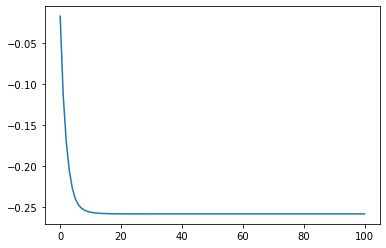

In [33]:
algo_gradient_avec_projection_pas_constant(f,df)